In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom

In [45]:
N = 33 # num 
from scipy.interpolate import make_interp_spline, BSpline

# x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
# xnew = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max

# spl = make_interp_spline(x, binom.pmf(x, n, p)*n, k=3) #BSpline object
# smooth = spl(xnew)

# plt.plot(xnew,smooth)
# plt.xticks(np.arange(min(xnew), max(xnew), 1.0))
# plt.title("Distribution of path length")
# plt.show()

In [46]:
x = np.arange(binom.ppf(0.1, n, p), binom.ppf(0.9, n, p))

NameError: name 'n' is not defined

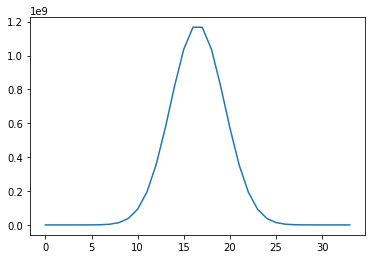

In [74]:
N = 33
plt.plot(binom.pmf(np.arange(0,N+1), N, 0.5)*(2**N))

In [26]:
grad_34 = pd.read_csv('experiment_data/grad_magnitude_resnet34.csv')[['0','1','15','16']]

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

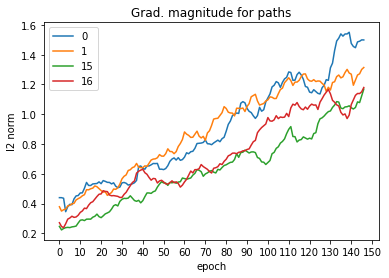

In [77]:
for col in grad_34.columns:
    grads = np.array(grad_34[col])
    grads = moving_average(grads, n=10)*5
    x = np.arange(len(grads))
    plt.plot(x,grads, label=col)
plt.xticks(np.arange(min(xnew), max(xnew), 10.0))
plt.title("Grad. magnitude for paths")
plt.xlabel('epoch')
plt.ylabel('l2 norm')
plt.legend()
plt.show()

In [52]:
N=34
path_nums = binom.pmf(np.arange(0,N+1), N, 0.5)*(2**N)

In [61]:
idx = 1
(path_nums[idx]*moving_average(np.array(grad_34[str(idx)]), n=10)).sum()

889.1511470794474

In [68]:
idx = 16
grad_34[str(idx)].sum()

22.46983099170029

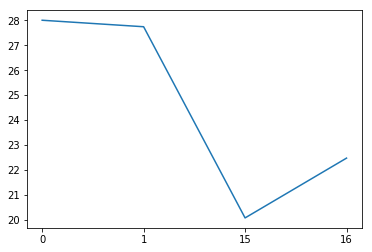

In [72]:
plt.plot(grad_34.sum())

In [78]:
grad_flow = pd.read_csv('grad_flow_experiment.csv')

In [83]:
path_lengths = binom.pmf(np.arange(0,N+1), N, 0.5)*(2**N)

In [90]:
grad_flows = np.array(grad_flow.sum())

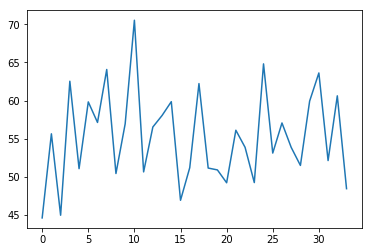

In [92]:
plt.plot(grad_flows)

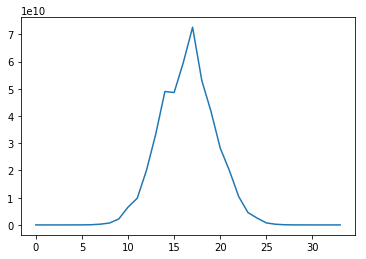

In [91]:
plt.plot(np.multiply(path_lengths, grad_flows))